<a href="https://colab.research.google.com/github/JeffersonNery/MVP_Machine_Learning_Analytics/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP DEEP LEARNING - Predição do preço do bitcoin usando LSTM**
## **Introdução**

O bitcoin foi a primeira moeda virtual a ser criada no mundo. O conceito foi introduzido em 2008 num white paper publicado por um grupo com o pseudônimo de Satoshi Nakamoto que o chamou de sistema eletrônico de pagamento *peer to peer*. Somente no mês de março de 2024 a movimentação da moeda chegou a incríveis US$ 29 bilhões com uma valorização de 144,82% desde abril de 2023. A alta valorização nos últimos anos deste ativo gera uma crescente demanda dos investidores por a criptomoeda.

## **Objetivo**

Este MVP tem como objetivo treinar um modelo de deep learning utilizando a arquitetura de rede neural recorrente LSTM *(long short term memory)* com a finalizade da predição do preço do bitcoin.

## **Definição do problema**

Investidores tem sido atraidos pela forte valorização do ativo, mas há o risco de volatilidade. A volatilidade é um indicador que mostra a intensidade e a frequência em que as movimentações de valor de um determinado ativo acontecem, dentro de um período de tempo, ou seja, podemos entender a volatilidade como uma maneira de medir a variação de um ativo. Um dos maiores interesses dos investidores é ter uma predição desta têndencia de valorização onde o preço pode sofrer um queda ou alta e realizar o trading (compra e venda no mercado). Sendo assim uma ferramenta que possa fazer essa predição da têndencia dos preços do bitcoin se torna uma grande vantagem para os investidores auxiliando a tomada de decisões. Utilizaremos o aprendizado de máquina no histórico de preços para predição da têdencia de sua valorização.

## **Definição do dataset**
Utilizaremos o site Yahoo Finanças para fazer o download da série histórica do preço do bitcoin no período de setembro de 2014 a abril de 2024. Após aplicar o período da serie histórica podemos efetuar o download do dataset "BTC-USD.csv"que será um arquivo do tipo csv (*comma-separated values*).

Fonte de dados do dataset: https://br.financas.yahoo.com/quote/BTC-USD/history



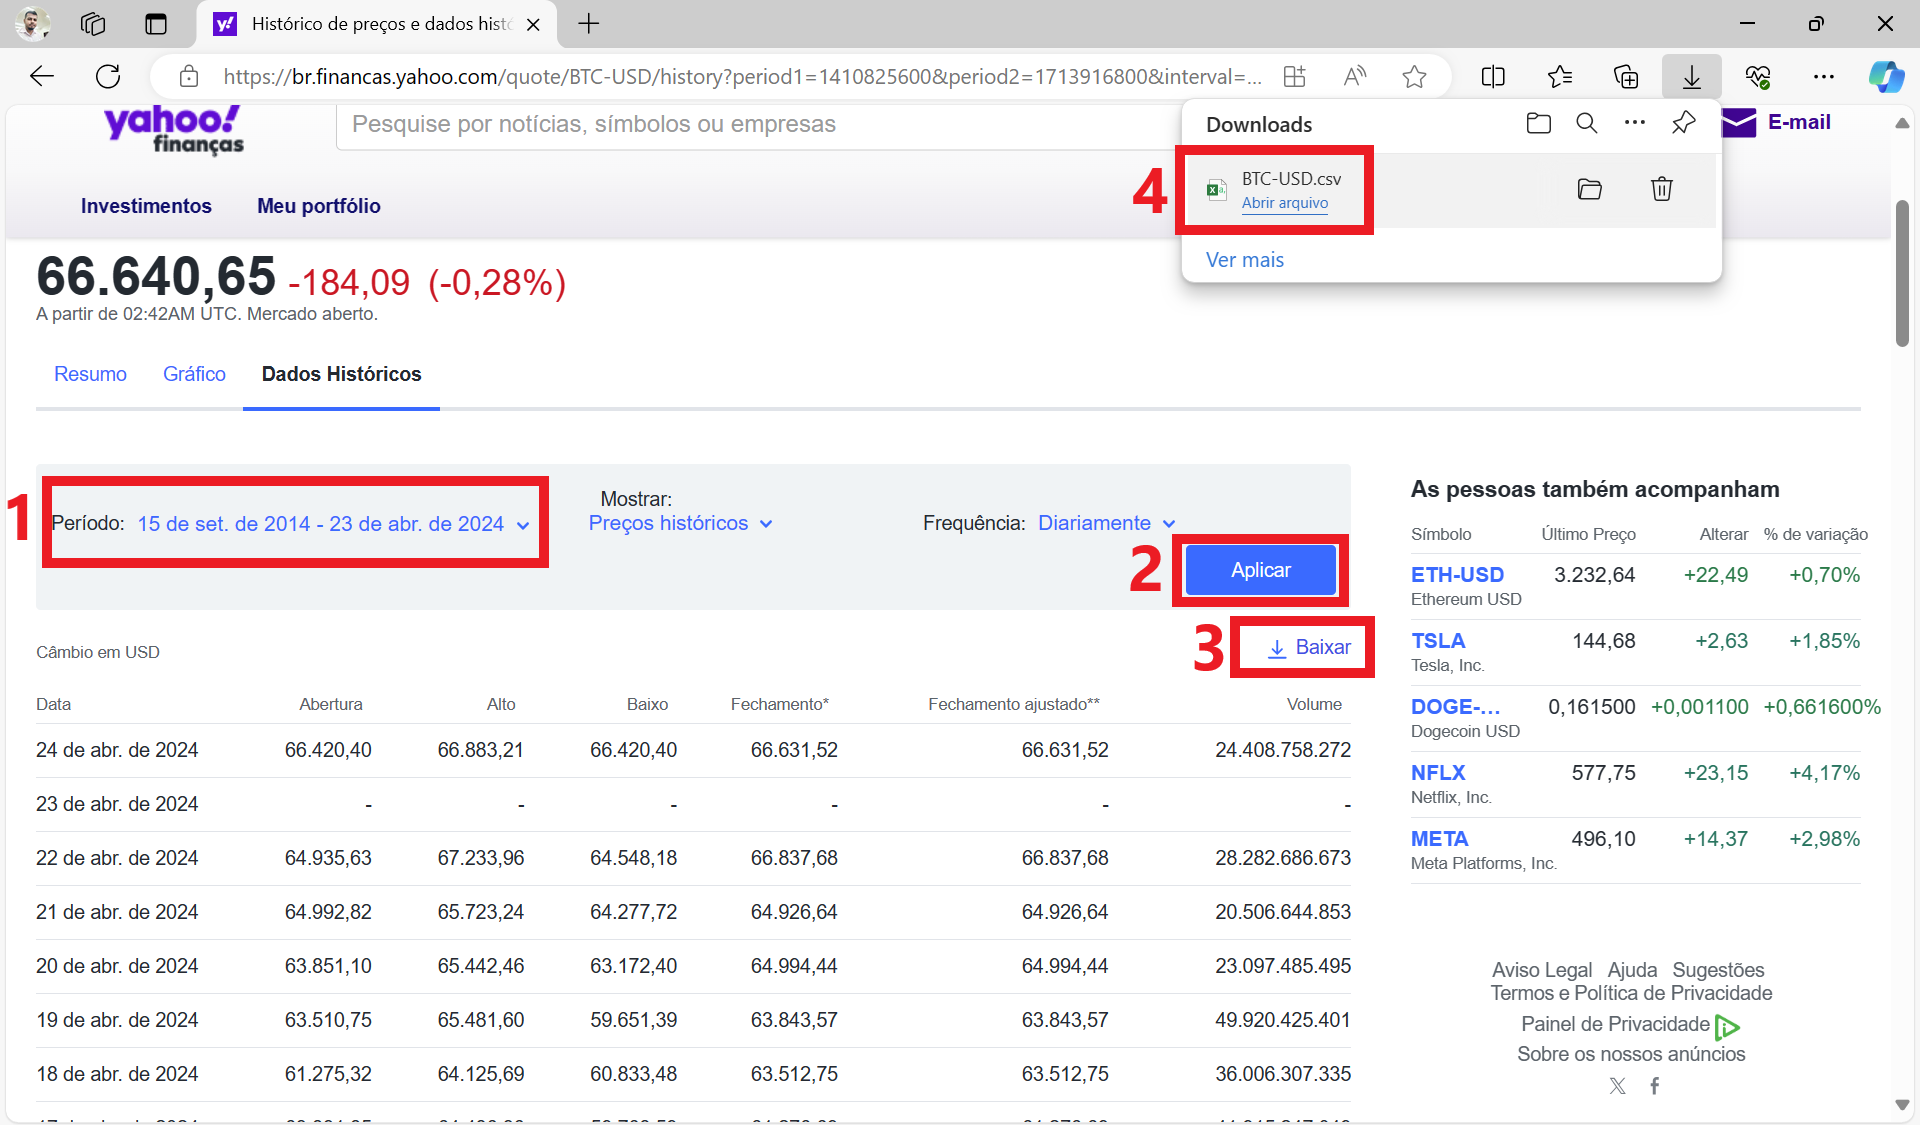

### **Descrição dos campos do dataset**
0-DATE - Data da série histórica\
1-OPEN -  Valor de abertura do ativo\
2-HIGH -  Valor máximo do ativo\
3-LOW -  Valor mínimo do ativo\
4-CLOSE -  Valor de fechamento do ativo\
5-ADJ CLOSE -  Fechamento ajustado do ativo\
6-VOLUME -  Volume negociado do ativo

### **Upload do dataset para o Github**
Após o download do dataset contendo as informações da série histórica do criptomoeda bitcoin vamos fazer o upload do mesmo para o repositório "MVP_Machine_Learning_Analytics" do github que será utilizado nas próximas etapas. 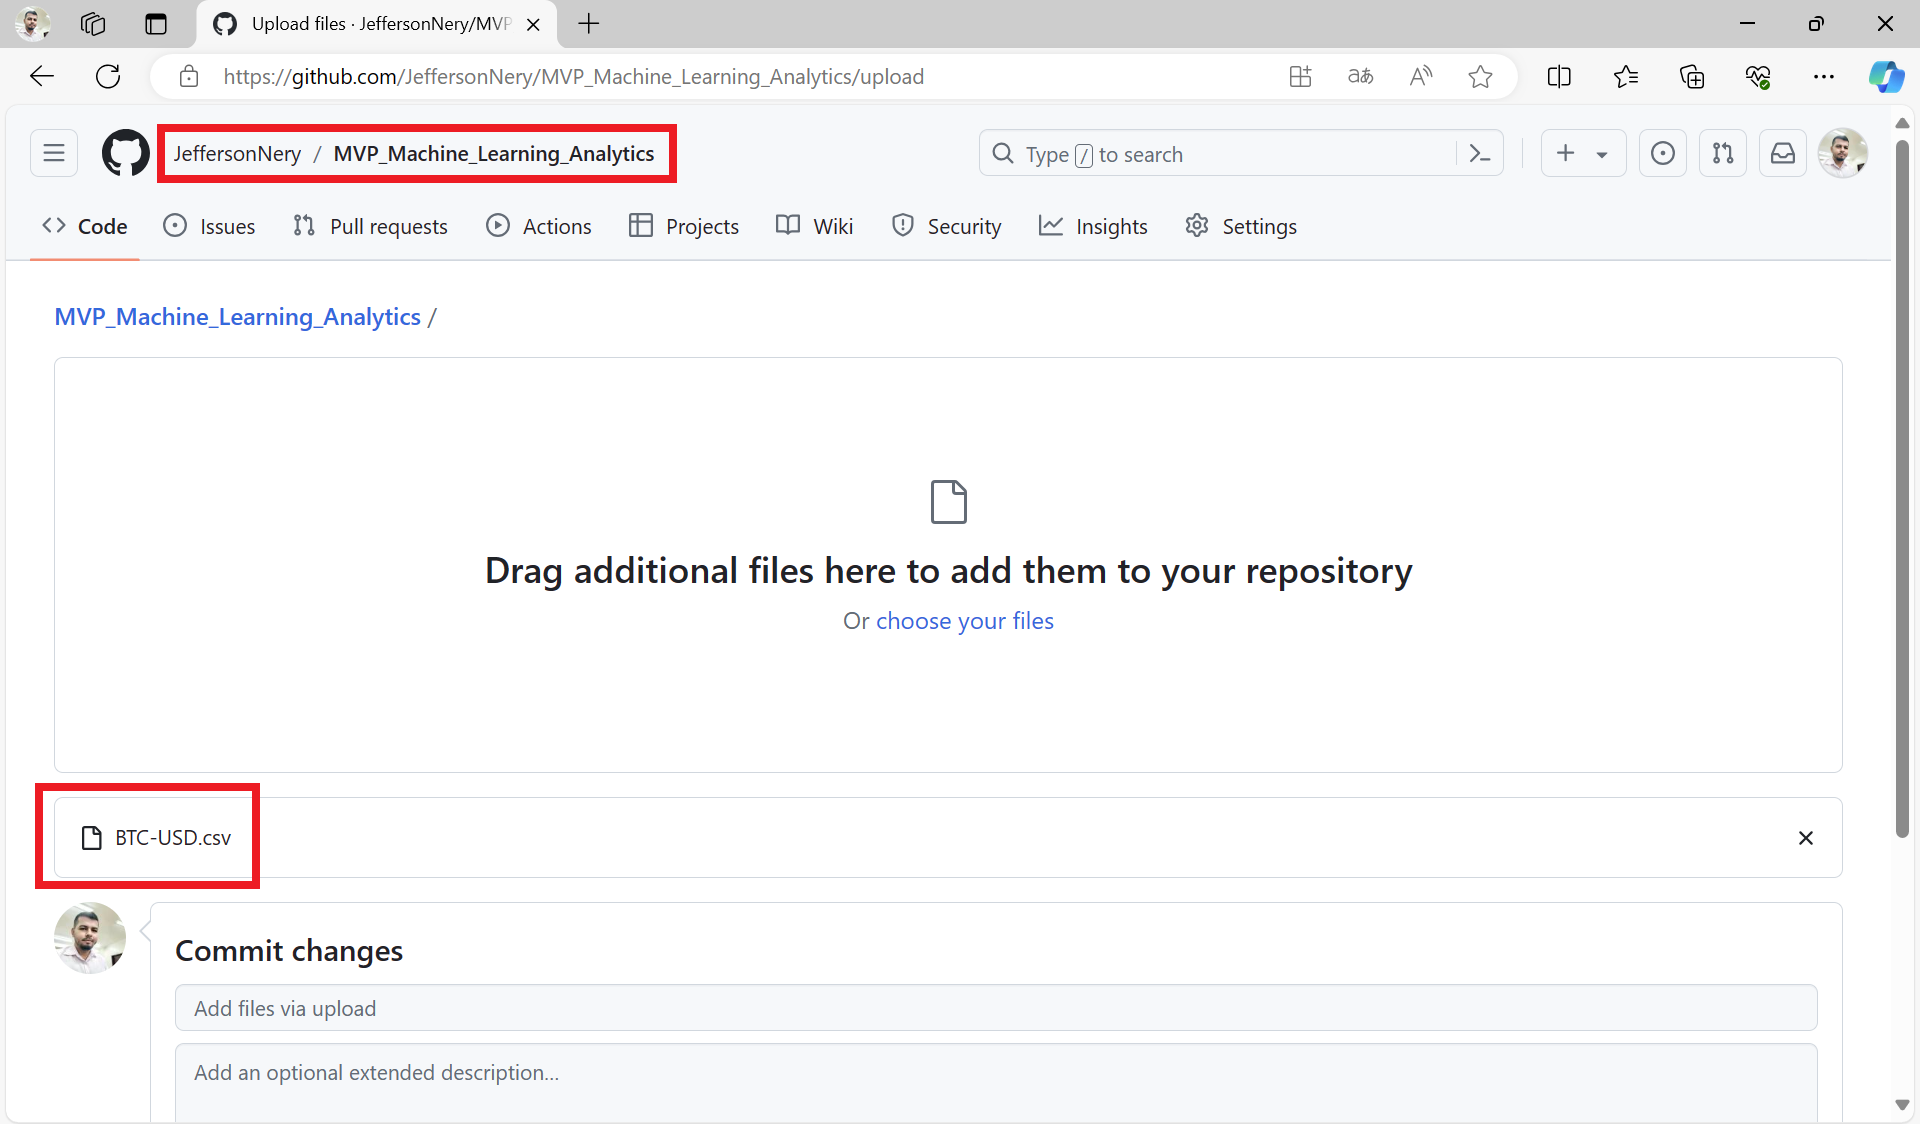



In [ ]:
# Importação das bibliotecas necessárias

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# Para avaliação usaremos as seguintes bibliotecas

from sklearn.metrics import mean_squared_error # erro quadrático médio
from sklearn.metrics import mean_absolute_error # média dos erros absolutos
# medir a proporção para qual um modelo matemático varia
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score # calcula o coeficiente de determinação
from sklearn.metrics import mean_poisson_deviance # média da regressão do desvio
from sklearn.metrics import mean_gamma_deviance # perda do desvio de progressão
from sklearn.metrics import accuracy_score # exibição da acurácia do modelo
from sklearn.preprocessing import MinMaxScaler # dimensiona o conjunto de dados

# Para a construção do modelo utilizaremos as seguintes bibliotecas

import tensorflow as tf # importando o tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

# Para a plotagem dos dados utilizaremos as segintes bibliotecas

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## **Carregando o dataset**
Nesta etapa iremos realizar o carregamento do nosso dataset que foi anteriormente armazenado no repositório do github.



In [ ]:
# Importando o dataset através de url

url_dados = 'https://raw.githubusercontent.com/JeffersonNery/MVP_Machine_Learning_Analytics/main/BTC-USD.csv'

In [ ]:
# Carga do dataset atráves do arquivo csv

maindf=pd.read_csv(url_dados)

In [ ]:
# Exibindo o total de informações do dataset

print('Total de dias presentes no dataset: ',maindf.shape[0])
print('Total de campos presentes no dataset: ',maindf.shape[1])

Total de dias presentes no dataset:  3508
Total de campos presentes no dataset:  7


In [ ]:
#criando o dataframe

maindf.shape

(3508, 7)

In [ ]:
# Exibindo as 5 primeiras linhas

maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
# Exibindo as 5 últimas linhas

maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3503,2024-04-20,63851.101563,65442.457031,63172.402344,64994.441406,64994.441406,2.309749e+10
3504,2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,2.050664e+10
3505,2024-04-22,64935.632813,67233.960938,64548.179688,66837.679688,66837.679688,2.828269e+10
3506,2024-04-23,NaN,NaN,NaN,NaN,NaN,NaN
3507,2024-04-24,66420.398438,66883.210938,66420.398438,66640.648438,66640.648438,2.439068e+10


In [ ]:
# Exibindo o quadro com as informações das colunas e seus tipos de dados

maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3508 non-null   object 
 1   Open       3507 non-null   float64
 2   High       3507 non-null   float64
 3   Low        3507 non-null   float64
 4   Close      3507 non-null   float64
 5   Adj Close  3507 non-null   float64
 6   Volume     3507 non-null   float64
dtypes: float64(6), object(1)
memory usage: 192.0+ KB


In [ ]:
# Contagem do desvio padrão das colunas

maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3.507000e+03
mean,15918.742244,16291.498265,15521.129436,15936.475351,15936.475351,1.713202e+10
std,17654.120694,18079.033427,17186.760939,17670.830344,17670.830344,1.928358e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1009.555023,1042.049988,984.846008,1012.589996,1012.589996,2.107975e+08
50%,8672.782227,8846.460938,8449.099609,8673.215820,8673.215820,1.278036e+10
75%,26798.372070,27154.048828,26415.308594,26812.481445,26812.481445,2.766343e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


## **Removendo valores nulos ou inválidos**

Está é uma etapa muito importante para o pré-processamento de dados, vamos identificar e remover valores nulou ou inválidos.

In [ ]:
# Exibindo valores nulos

print('Valores nulos: ', maindf.isnull().values.sum())

Valores nulos:  6


In [ ]:
# Exibindo valores NA

print('Valores NA: ',maindf.isnull().values.any())

Valores NA:  True


In [ ]:
# Removendo os valores nulos do nosso dataset

maindf=maindf.dropna()

In [ ]:
# Verificando se os valores nulos foram removidos

print('Valores nulos: ', maindf.isnull().values.sum())
print('Valores NA: ',maindf.isnull().values.any())

Valores nulos:  0
Valores NA:  False


In [ ]:
# Formato final do dataset após a remoção de valores nulos

maindf.shape

(3507, 7)

## **EDA - Análise de dados exploratória**

Verificando os tipos de dados do nosso dataset.

In [ ]:
# Exibindo a data inicial e data final do nosso dataset

diainicial=maindf.iloc[0][0]
diafinal=maindf.iloc[-1][0]

print('Data de início' ,diainicial)
print('Data final' ,diafinal)

Data de início 2014-09-17
Data final 2024-04-24


## **Análise do preço do ativo desde o início**

## ***Análise do ano de 2014***


In [ ]:
# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

#criando uma variavel que contenha as informações somente do ano de 2014
y_2014 = maindf.loc[(maindf['Date'] >= '2014-09-17')
                    & (maindf['Date'] < '2014-12-31')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2014.drop(y_2014[['Adj Close', 'Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
100,2014-12-26,319.152008,331.424011,316.627014,327.924011
101,2014-12-27,327.583008,328.911011,312.630005,315.863007
102,2014-12-28,316.160004,320.028015,311.078003,317.239014
103,2014-12-29,317.700989,320.266998,312.307007,312.670013


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2014

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibir a tabela

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,412.654003,407.182428


Podemos notar que em nosso dataset os 8 primeiros meses não possuem informações e retornam NaN (Not a Number), por esse motivos eles não seram plotados mais a frente.



In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título
# do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

Conforme foi dito ateriormente os nove primeiros meses não possuem informações em nosso dataset e por isso não foram plotados.

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do
# preço e o valor máximo do preço
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2014.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título
# do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

Conforme foi dito ateriormente os nove primeiros meses não possuem informações em nosso dataset e por isso não foram plotados.

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2014 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de
# preço de abertura, fechamento, máximo e mínimo
fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'],
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2015***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2015

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2015
y_2015 = maindf.loc[(maindf['Date'] >= '2015-01-01')
                     & (maindf['Date'] < '2016-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
106,2015-01-01,320.434998,320.434998,314.002991,314.248993
107,2015-01-02,314.079010,315.838989,313.565002,315.032013
108,2015-01-03,314.846008,315.149994,281.082001,281.082001
109,2015-01-04,281.145996,287.230011,257.612000,264.195007
110,2015-01-05,265.084015,278.341003,265.084015,274.473999
...,...,...,...,...,...
466,2015-12-27,416.514008,424.006989,408.882996,422.822998
467,2015-12-28,423.342987,429.769012,418.480988,422.278992
468,2015-12-29,422.097992,432.983002,420.627014,432.983002
469,2015-12-30,433.299988,434.386993,422.084015,426.619995


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2015

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)# reordenando as colunas
monthvise # exibir a tabela

,Open,Close
Date,,
January,251.799905,248.782547
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708667,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título
# do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do
# preço e o valor máximo do preço
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2015.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título
# do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2015 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de
# preço de abertura, fechamento, máximo e mínimo
fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'],
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2016***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2016

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2016
y_2016 = maindf.loc[(maindf['Date'] >= '2016-01-01')
                     & (maindf['Date'] < '2017-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
471,2016-01-01,430.721008,436.246002,427.515015,434.334015
472,2016-01-02,434.622009,436.062012,431.869995,433.437988
473,2016-01-03,433.578003,433.743011,424.705994,430.010986
474,2016-01-04,430.061005,434.516998,429.084015,433.091003
475,2016-01-05,433.069000,434.182007,429.675995,431.959991
...,...,...,...,...,...
832,2016-12-27,908.354004,940.047974,904.255005,933.197998
833,2016-12-28,934.830994,975.921021,934.830994,975.921021
834,2016-12-29,975.125000,979.396973,954.502991,973.497009
835,2016-12-30,972.534973,972.534973,934.833008,961.237976


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2016

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)# reordenando as colunas
monthvise # exibir a tabela

,Open,Close
Date,,
January,412.805902,410.844485
February,402.304692,404.408274
March,417.262033,416.525774
April,433.487433,434.339398
May,459.237547,461.954415
June,638.544834,642.869061
July,662.977779,661.356103
August,581.238966,579.585197
September,604.614034,605.848633


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a
# informação de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2016.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2016 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço de
# abertura, fechamento, máximo e mínimo
fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'],
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2017***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2017

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2017
y_2017 = maindf.loc[(maindf['Date'] >= '2017-01-01')
                     & (maindf['Date'] < '2018-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
837,2017-01-01,963.658020,1003.080017,958.698975,998.325012
838,2017-01-02,998.617004,1031.390015,996.702026,1021.750000
839,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966
840,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980
841,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005
...,...,...,...,...,...
1197,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000
1198,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000
1199,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195
1200,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2017

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)# reordenando as colunas
monthvise # exibir a tabela

,Open,Close
Date,,
January,914.680971,914.916159
February,1055.620071,1062.533672
March,1133.212576,1129.365228
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2017.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de 2017
# do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço de
# abertura, fechamento, máximo e mínimo
fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2018***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2018

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2018
y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1202,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195
1203,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
1204,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
1205,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
1206,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
...,...,...,...,...,...
1562,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496
1563,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701
1564,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691
1565,2018-12-30,3822.384766,3901.908936,3797.219238,3865.952637


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2018

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,13212.074219,13085.558090
February,9462.242920,9472.001151
March,9156.591718,9040.557097
April,7963.618311,8033.596631
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2018 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço de
# abertura, fechamento, máximo e mínimo
fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2019***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2019

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2019
y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1567,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020
1568,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424
1569,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211
1570,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529
1571,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580
...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2019

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
#de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2019 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço de
# abertura, fechamento, máximo e mínimo
fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'],
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2020***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2020

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2020
y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2020

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas

# atribuindo o valor mínimo
monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2020 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço de
# abertura, fechamento, máximo e mínimo
fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2021***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2021

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2021
y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-12-31')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
2657,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625
2658,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
2659,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
2660,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2021

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2021 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço
# de abertura, fechamento, máximo e mínimo
fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2022***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2022

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2022
y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2023-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2663,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
2664,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
2665,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
2666,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
2667,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
3023,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
3024,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
3025,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797
3026,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2022

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2022 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço
# de abertura, fechamento, máximo e mínimo
fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2023***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2023

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2023
y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2024-01-01')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
3028,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078
3029,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703
3030,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422
3031,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281
3032,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328
...,...,...,...,...,...
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344
3391,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2023

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28823.841732,28857.574544
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2023 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço
# de abertura, fechamento, máximo e mínimo
fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'],
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## ***Análise do ano de 2024***

In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2024

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações somente do ano de 2024
y_2024 = maindf.loc[(maindf['Date'] >= '2024-01-01')
                     & (maindf['Date'] < '2024-04-24')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_2024.drop(y_2024[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
3393,2024-01-01,42280.234375,44175.437500,42214.976563,44167.332031
3394,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750
3395,2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781
3396,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875
3397,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406
...,...,...,...,...,...
3501,2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906
3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570313
3503,2024-04-20,63851.101563,65442.457031,63172.402344,64994.441406
3504,2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2024

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,67372.752394,67702.439264
April,66866.715554,66660.903232
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


Podemos notar que em nosso dataset a série histórica finaliza no dia 24/04/204 e os demais meses não possuem informações e retornam NaN (Not a Number), por esse motivos eles não seram plotados mais a frente.

In [ ]:
# Criando um gráfico de barras comparativo dos meses com a média de valores de
# abertura e fechamento do bitcoin

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de abertura com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'], # definindo o atributo
    name='Bitcoin - preço de abertura', # legenda do gráfico
    marker_color='forestgreen' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço de fechamento com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'], #definindo o atributo
    name='Bitcoin - preço de fechamento', # legenda do gráfico
    marker_color='royalblue' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparação mensal do preço de abertura e fechamento do bitcoin')

fig.show() # exibir o gráfico

Conforme foi dito ateriormente os meses a partir de maio não possuem informações em nosso dataset e por isso não foram plotados.

In [ ]:
# Criando um gráfico de barras comparativo dos meses com os valores máximo e
# mínimo do preço do bitcoin

# especificando o formato de data e definindo a média do valor mínimo do preço
# e o valor máximo do preço
y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
# atribuindo o valor máximo
monthvise_high = y_2024.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0) # reordenando as colunas
# atribuindo o valor mínimo
monthvise_low = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0) # reordenando as colunas

fig = go.Figure() # definindo a variável para criação do gráfico

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço máximo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high, # definindo o atributo
    name='Bitcoin - preço máximo', # legenda do gráfico
    marker_color='rgb(0, 153, 204)' # definindo a cor da barra
))

# definindo o tipo de gráfico barra e nesta coluna será utilizando a informação
# de preço mínimo com os meses da váriavel monthvise
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low, # definindo o atributo
    name='Bitcoin - preço mínimo', # legenda do gráfico
    marker_color='rgb(255, 128, 0)' # definindo a cor da barra
))

# agrupando e definindo o layout do gráfico de barra e definição do título do gráfico
fig.update_layout(barmode='group',
                  title=' Comparação mensal do preço máximo e mínimo do bitcoin')
fig.show() # exibir o gráfico

In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2024 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])
# definindo o tipo de gráfico linhas e será utilizado as informações de preço de
# abertura, fechamento, máximo e mínimo
fig = px.line(y_2024, x=y_2024.Date, y=[y_2024['Open'], y_2024['Close'],
                                          y_2024['High'], y_2024['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## **Análise geral de 2014 a 2024**

In [ ]:
# Visualizando a tabela geral com o preço médio de abertura e fechamento de 2014
# a 2024

# convertendo a coluna data para data/hora
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')
#criando uma variavel que contenha as informações do ano de 2014 a 2024
y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2024-04-24')]
# removendo as colunas de Ajuste de fechamento e Volume, ficando apenas com as
# informações de Abertura, Alta, Baixa e fechamento
y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570313
3503,2024-04-20,63851.101563,65442.457031,63172.402344,64994.441406
3504,2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531
3505,2024-04-22,64935.632813,67233.960938,64548.179688,66837.679688


In [ ]:
# Visualizando a tabela com o preço médio de abertura e fechamento do ano de
# 2014 a 2024

# convertendo as datas e agrupando as informações de Abertura e Fechamento
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0) # reordenando as colunas
monthvise # exibindo a tabela

,Open,Close
Date,,
January,16579.492690,16579.732894
February,18365.801165,18492.403748
March,21063.951157,21148.616195
April,20594.256898,20571.875110
May,14897.735676,14807.430843
June,13058.934120,13023.092093
July,12946.813125,12989.735743
August,14402.491680,14403.907037
September,13142.241365,13122.887938


In [ ]:
# Criando um gráfico de linhas comparativo com a tendência geral do ano de
# 2014 a 2024 do bitcoin

#definindo as legendas do gráfico
names = cycle(['Bitcoin - preço de abertura','Bitcoin - preço de fechamento',
               'Bitcoin - preço máximo','Bitcoin - preço mínimo'])

# definindo o tipo de gráfico linhas e será utilizado as informações de preço de
# abertura, fechamento, máximo e mínimo
fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Data','value':'Valores bitcoin'}) # legenda do rótulo

# definindo o título do gráfico e título das legendas
fig.update_layout(title_text='Gráfico de análise do bitcoin', font_size=15,
                  font_color='black',legend_title_text='Bitcoin parâmetros')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y

fig.show() # exibir o gráfico

## **Construindo o modelo LSTM**

1 - A primeira etapa será preparar os dados para treinamento e teste

2 - Vamos considerar 1 ano de dados para treinamento

3 - Devido a alta oscilação do ativo bitcoin onde no ano de 2014 estava a 200 dólares e subiu para 20 mil dólares em 2018 *(aproximadamente)* consideraremos apenas 1 ano para não afetar a precisão do modelo com esse tipo de flutuação nos dados.

4 - Como nosso objetivo é prever o fechamento do preço do bitcoin vamos considerar apenas as colunas Date "data" e Close "fechamento".



In [ ]:
# criando uma variavél apenas com o valor de fechamento e data.
closedf = maindf[['Date','Close']]
#
print("Formato do quadro de fechamento:", closedf.shape)

Formato do quadro de fechamento: (3507, 2)


In [ ]:
# definindo o tipo de gráfico linhas e será utilizado as informações data e
# preço de fechamento
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date',
                                                               'close':'Bitcoin - fechamento'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
# definindo o título do gráfico
fig.update_layout(title_text='Fechamento do preço do bitcoin entre os anos de 2014 a 2024',
                  plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y
fig.show() # exibindo o gráfico

## **Definindo o período para análise e previsão do modelo**

In [ ]:
# Definindo o período de 6 meses na váriavel de fechamento
closedf = closedf[closedf['Date'] > '2023-10-24']
close_stock = closedf.copy() #copiando as informações para a variável
#Exibindo o total de dias para a predição
print("Total de dias para a predição: ",closedf.shape[0])

Total de dias para a predição:  182


In [ ]:
# exibindo as informações da variável
closedf

,Date,Close
3325,2023-10-25,34502.820313
3326,2023-10-26,34156.648438
3327,2023-10-27,33909.800781
3328,2023-10-28,34089.574219
3329,2023-10-29,34538.480469
...,...,...
3502,2024-04-19,63843.570313
3503,2024-04-20,64994.441406
3504,2024-04-21,64926.644531
3505,2024-04-22,66837.679688


In [ ]:
# gerando gráfico com base nos dados de fechamento do preço do bitcoin
# definidos na variável anterior
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date',
                                                               'close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Período considerado para prever o preço do bitcoin',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y
fig.show()

## **Normalização dos dados**

A normalização de dados é uma técnica frequentemente aplicada como parte da preparação de dados para machine learning. O objetivo da normalização é alterar os valores das colunas numéricas do conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores ou perder informações.

*MinMaxScaler* - para cada valor em um recurso, o método *MinMaxScaler* subtrai o valor mínimo do recurso e depois divide pelo intervalo. O intervalo é a diferença entre o máximo original e o mínimo original. O método *MinMaxScaler* dimensiona o conjunto de dados de modo que todos os valores de recursos estejam no intervalo [0, 1] ou no intervalo [-1,1] se houver valores negativos nos dados.

In [ ]:
# excluindo a coluna de data da variável de fechamento do nosso modelo e
#preprando os dados para análise

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))

#exibindo as informações
print(closedf.shape)

(182, 1)


## **Separando o conjunto de dados para treinamento e teste**

In [ ]:
# atribuindo um percentual de 60% para o conjunto de treinamento e 40% para o
# conjunto de teste

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]


print("Dias para treino: ", train_data.shape)
print("Dias para teste: ", test_data.shape)

Dias para treino:  (109, 1)
Dias para teste:  (73, 1)


Agora transformamos o preço de fechamento com base no requisito de previsão de análise de série temporal, iremos utilizar 15 etapas.

In [ ]:
# convertendo a matrix de valores para uma matrix de conjunto de dados

# criando um conjunto de dados para treinamento do modelo
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] # i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# preparando os dados em sequência de entrada e saida para o treino e teste do modelo
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# exibindo as informações de entrada e saídas
print("X_treino: ", X_train.shape)
print("y_treino: ", y_train.shape)
print("X_teste: ", X_test.shape)
print("y_teste", y_test.shape)

X_treino:  (93, 15)
y_treino:  (93,)
X_teste:  (57, 15)
y_teste (57,)


In [ ]:
# remodelando o conjunto de dados que é necessário para o LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# exibindo o conjunto de dados remodelado
print("X_treino: ", X_train.shape)
print("X_teste: ", X_test.shape)

X_treino:  (93, 15, 1)
X_teste:  (57, 15, 1)


## **Construção do modelo real**

In [ ]:
# definindo um variável e construindo o modelo LSTM sequencial para a rede neural
model=Sequential()
# definindo 10 unidades para processar os dados utilizando a unidade linear retificada
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
# apenas 1 perceptron
model.add(Dense(1))
# utilizando a média quadrática como perda e como otimização "adam"
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
# criando uma variável histórica para armazenar o histórico do modelo
# serão usadas 200 iterações, e 32 amostras

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,
                    batch_size=32,verbose=1)

Epoch 1/200
3/3 [==============================] - 2s 150ms/step - loss: 0.0517 - val_loss: 0.9313
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0473 - val_loss: 0.8881
Epoch 3/200
3/3 [==============================] - 0s 32ms/step - loss: 0.0435 - val_loss: 0.8474
Epoch 4/200
3/3 [==============================] - 0s 42ms/step - loss: 0.0398 - val_loss: 0.8098
Epoch 5/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0365 - val_loss: 0.7747
Epoch 6/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0335 - val_loss: 0.7421
Epoch 7/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0308 - val_loss: 0.7115
Epoch 8/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0283 - val_loss: 0.6828
Epoch 9/200
3/3 [==============================] - 0s 54ms/step - loss: 0.0259 - val_loss: 0.6556
Epoch 10/200
3/3 [==============================] - 0s 42ms/step - loss: 0.0238 - val_loss: 0.6301
Epoch 11/200
3/3 [

## **Plotando a Perda treinamento x Perda validação**


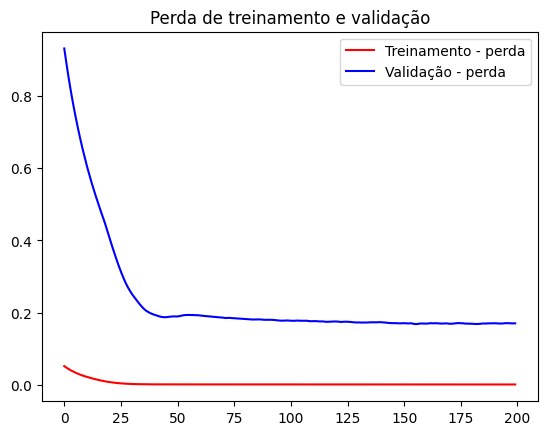

<Figure size 640x480 with 0 Axes>

In [ ]:
# exibindo o gráfico com o comparativo de evolução de perda durante o
# treinamento e validação do modelo
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Treinamento - perda') # definindo a legenda
plt.plot(epochs, val_loss, 'b', label='Validação - perda') # definindo a legenda
plt.title('Perda de treinamento e validação') # título do gráfico
plt.legend(loc=0)
plt.figure()

#exibindo o gráfico
plt.show()

In [ ]:
#criando a variável do modelo de previsão de treino e previsão de teste

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
# exibindo as informações de saída
train_predict.shape, test_predict.shape

2/2 [==============================] - 0s 6ms/step


((93, 1), (57, 1))

## **Avaliação do modelo**

In [ ]:
# retornando a escala original após o treinamento do modelo

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

## **Métricas de avaliação RMSE, MSE e MAE**

In [ ]:
# exibindo os resultados das métricas de RMSE, MSE e MAE para avaliar o desempenho

print("Treino dados RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Treino dados MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Treino dados MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Teste dados RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Teste dados MSE: ", mean_squared_error(original_ytest,test_predict))
print("Teste dados MAE: ", mean_absolute_error(original_ytest,test_predict))

Treino dados RMSE:  1225.0291275104078
Treino dados MSE:  1500696.363248911
Treino dados MAE:  960.6294522607521
-------------------------------------------------------------------------------------
Teste dados RMSE:  16166.187316640628
Teste dados MSE:  261345612.3567123
Teste dados MAE:  15905.603618600877


## **Pontuação da regressão de variância**

In [ ]:
# exibindo a pontuação dos dados de treino e teste usando regressão
print("Treino - pontuação do dados de regressão:",
      explained_variance_score(original_ytrain, train_predict))
print("Teste - pontuação do dados de regressão:",
      explained_variance_score(original_ytest, test_predict))

Treino - pontuação do dados de regressão: 0.8176511380814475
Teste - pontuação do dados de regressão: 0.3935169085589918


## **Pontuação de regressão R square**

In [ ]:
# exibindo a pontuação dos dados de treino e teste usando R square
print("Treino - pontuação dos dados R2:", r2_score(original_ytrain, train_predict))
print("Teste - pontuação dos dados R2", r2_score(original_ytest, test_predict))

Treino - pontuação dos dados R2: 0.8176496901687895
Teste - pontuação dos dados R2 -17.965463256580758


## **Desvio Gama Médio (MGD) e Desvio de Poisson Médio (MPD)**

In [ ]:
# exibindo os valores MGD e MPD dos dados de treino e teste
print("Treino - dados MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Teste - dados MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Treino - dados MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Teste - dados MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Treino - dados MGD:  0.0008497444326993166
Teste - dados MGD:  0.08307027361820889
----------------------------------------------------------------------
Treino - dados MPD:  35.6379370756866
Teste - dados MPD:  4646.1819642974315


## **Comparação entre o preço original de fechamento do bitcoin e o preço de fechamento previsto**

In [ ]:
# armazenandos as previsões do modelo para os dados de treinamento e preenchendo
# com os valores previstos
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Treinamento dos dados previstos: ", trainPredictPlot.shape)

# armazenandos as previsões do modelo para os dados de teste e preenchendo com
# os valores previstos
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Teste dos dados previstos: ", testPredictPlot.shape)

# definindo a variável e nomes
names = cycle(['Preço original de fechamento','Treino - previsão de fechamento',
               'Teste - previsão de fechamento'])

# modelando o data frame
plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

# definindo o gráfico do tipo linha para exibição
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin preço','date': 'Date'})
# definindo o título do gráfico
fig.update_layout(title_text='Comparação entre o preço de fechamento original e o preço de fechamento previsto',
                  plot_bgcolor='white', font_size=15, font_color='black',
                  legend_title_text='Preço de fechamento')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y
fig.show() # exibindo o gráfico

Treinamento dos dados previstos:  (182, 1)
Teste dos dados previstos:  (182, 1)


## **Previsão para os próximos 30 dias**

In [ ]:
# formatando o modelo com os últimos dias de dados de testes como uma entrada
# para o modelo
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# loop realizando previsões para os próximos 30 dias
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Resultado previsto para os próximo dias: ", len(lst_output))

Resultado previsto para os próximo dias:  30


## **Exibindo os últimos 15 dias do conjunto de dados e prevendo os próximos 30 dias**

In [ ]:
# arrays criados para indexar os dados e exibir os últimos 15 dias e os
# próximos 30 dias
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
# criando um matriz com os valores originais e previsto dos últimos dias
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

#atribuindo os valores originais e previstos
last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(
    closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(
    np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

#criando um data frame com as colunas dos últimos valores originais e proximos
# valores previstos
new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
# definindo a variável
names = cycle(['Preço de fechamento dos últimos 15 dias','Preço de fechamento previsto para os próximos 30 dias'])
# criando um gráfico de linha com os valores originais e valores previstos
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Bitcoin preço','index': 'Período'})
fig.update_layout(title_text='Comparativo ultimos 15 dias x próximos 30 dias',
                  plot_bgcolor='white', font_size=15, font_color='black',
                  legend_title_text='Preço de fechamento')
#atualizando o nome da série do gráfico
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y
fig.show() # exibição do gráfico

## **Exibindo todo o preço de fechamento do bitcoin com a previsão dos próximos 30 dias**

In [ ]:
#criando uma lista e convertendo o dataframe
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]
# definindo a variável
names = cycle(['Preço de fechamento'])
# criando um gráfico de linha com os valores previstos para os próximos 30 dias
fig = px.line(lstmdf,labels={'value': 'Bitcoin preço','index': 'Período'})
fig.update_layout(title_text='Previsão de fechamento do preço do bitcoin para os próximos 30 dias',
                  plot_bgcolor='white', font_size=15, font_color='black',
                  legend_title_text='Bitcoin')
#atualizando o nome da série do gráfico
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False) # removendo as grades do eixo x
fig.update_yaxes(showgrid=False) # removendo as grades do eixo y
fig.show() # exibição do gráfico

## **Avaliando os resultados**

Em nosso dataset com a série histórica do bitcoin do ano de 2014 a 2024 podemos notar uma variação grande nos resultados do preço de fechamento ao longo dos anos conforme os gráficos anuais exibem. Para treinar nosso modelo optamos por usar os últimos 6 meses do preço de fechamento onde se mostrou mais eficaz devido a alta volatilitade do ativo.

Utilizamos a rede LSTM (long short term memory) que é uma arquitetura de rede neural recorrente RNN pois é um modelo recomendado para classificar e prever séries temporais e os resultados demonstraram isso. Dos 182 dias foram definido 60% dos dias para treinamento e 40% para teste com o preço de fechamento do ativo. No treinamento foi observado o overfitting da validação. Foram utilizadas as métricas RMSE, MSE e MAE onde os melhores resultados foram da RMSE.

O modelo obteve boas pontuação na regressão de variância e R-square, o MGD (desvio de gama média) obteve melhores resultados em comparação ao MPD. Claro que melhorias devem ser realizadas no modelo para melhoramento da rede neural.

Por fim, o modelo demonstrou baseado nos testes e treinamento que a previsão do preço de fechamento do ativo bitcoin, entretanto em alguns execuções o modelo exibe informações que não fazem sentido, tendo que executá-lo novamente para obter melhores resultados.

## **Conclusão**

Antes de finalizar devemos reiterar que o preço do ativo bitcoin é muito volátil, podendo sofrer inúmeras variações por *n* fatores, um exemplo clássico foi em janeiro de 2021 quando o Elon Musk colocou na bio da rede social X (antigo Twitter) "#bitcoin" o ativo subiu mais de 17% atingindo US$ 38 mil dólares. Reitero que foi um enorme desafio para minha pessoa desenvolver este modelo de rede LSTM para o MVP da disciplina Machine Learning e Analytics e espero que o trabalho atinja os objetivos da disciplina.